In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
cereal_data = pd.read_csv("C:\\Users\\hp\\Desktop\\Projects Data\\cereal.csv")

In [9]:
print("Dataset Head:")
print(cereal_data.head())
print("\nDataset Info:")
print(cereal_data.info())
print("\nSummary Statistics:")
print(cereal_data.describe())

Dataset Head:
                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
4   14.0       8      -1        25      3     1.0  0.75  34.384843  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data c

In [21]:
columns_to_clean = ['sugars', 'carbo', 'potass']

# Replace negative values with NaN
for column in columns_to_clean:
    cereal_data[column] = cereal_data[column].apply(lambda x: x if x >= 0 else None)

# Verify the cleaning process
print("\nSummary After Cleaning Negative Values:")
print(cereal_data[columns_to_clean].describe())


Summary After Cleaning Negative Values:
          sugars      carbo      potass
count  76.000000  76.000000   75.000000
mean    7.026316  14.802632   98.666667
std     4.378656   3.907326   70.410636
min     0.000000   5.000000   15.000000
25%     3.000000  12.000000   42.500000
50%     7.000000  14.500000   90.000000
75%    11.000000  17.000000  120.000000
max    15.000000  23.000000  330.000000


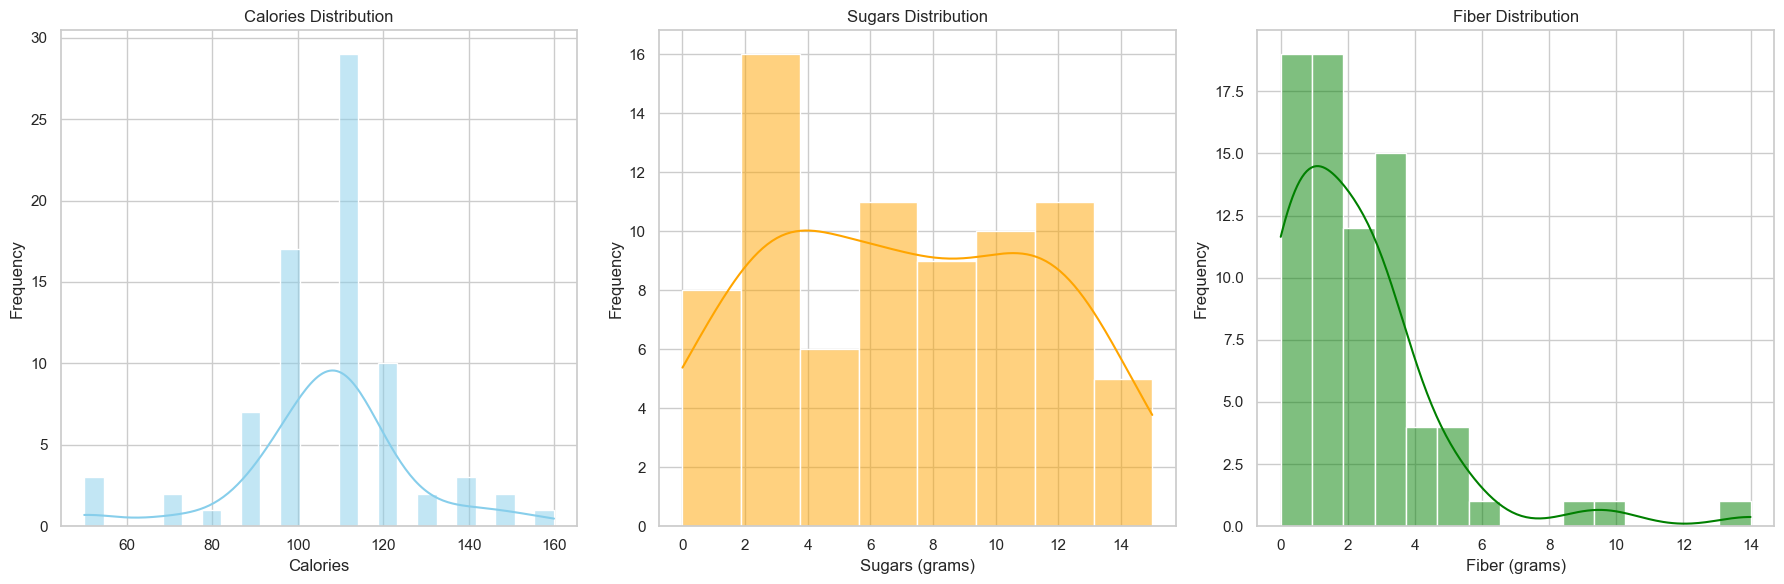

In [25]:
sns.set(style="whitegrid")

# Histograms of key nutritional variables
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(cereal_data['calories'], kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Calories Distribution")
axes[0].set_xlabel("Calories")
axes[0].set_ylabel("Frequency")

sns.histplot(cereal_data['sugars'], kde=True, ax=axes[1], color="orange")
axes[1].set_title("Sugars Distribution")
axes[1].set_xlabel("Sugars (grams)")
axes[1].set_ylabel("Frequency")

sns.histplot(cereal_data['fiber'], kde=True, ax=axes[2], color="green")
axes[2].set_title("Fiber Distribution")
axes[2].set_xlabel("Fiber (grams)")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

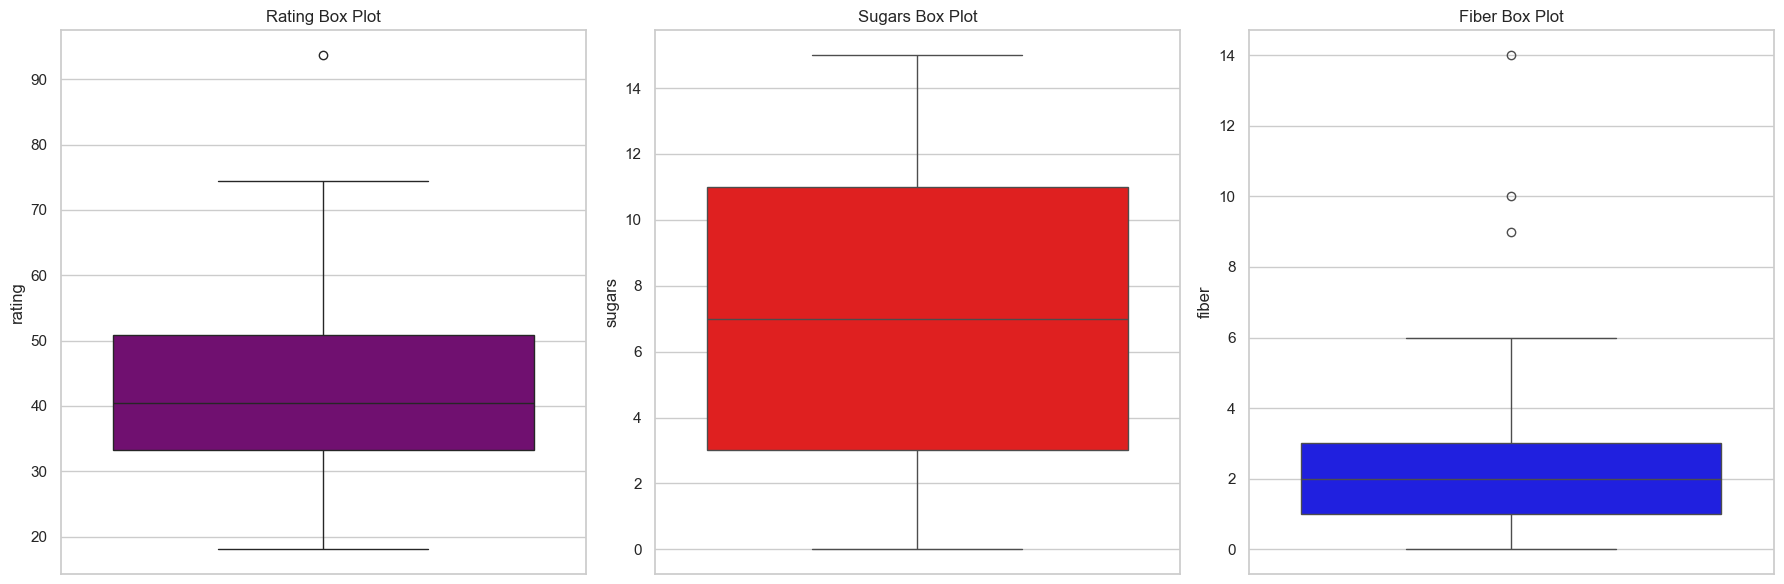

In [27]:
# Box plots to analyze outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(y='rating', data=cereal_data, ax=axes[0], color="purple")
axes[0].set_title("Rating Box Plot")

sns.boxplot(y='sugars', data=cereal_data, ax=axes[1], color="red")
axes[1].set_title("Sugars Box Plot")

sns.boxplot(y='fiber', data=cereal_data, ax=axes[2], color="blue")
axes[2].set_title("Fiber Box Plot")

plt.tight_layout()
plt.show()

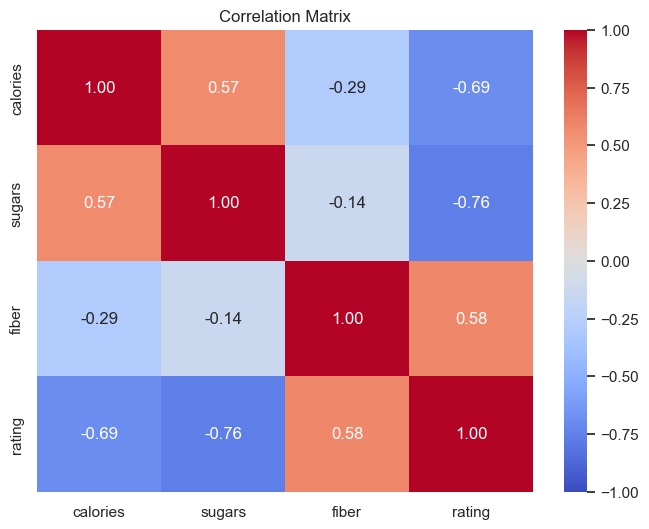

In [29]:
# Step 4: Correlation Analysis
# Select relevant columns for correlation analysis
correlation_columns = ['calories', 'sugars', 'fiber', 'rating']
correlation_matrix = cereal_data[correlation_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

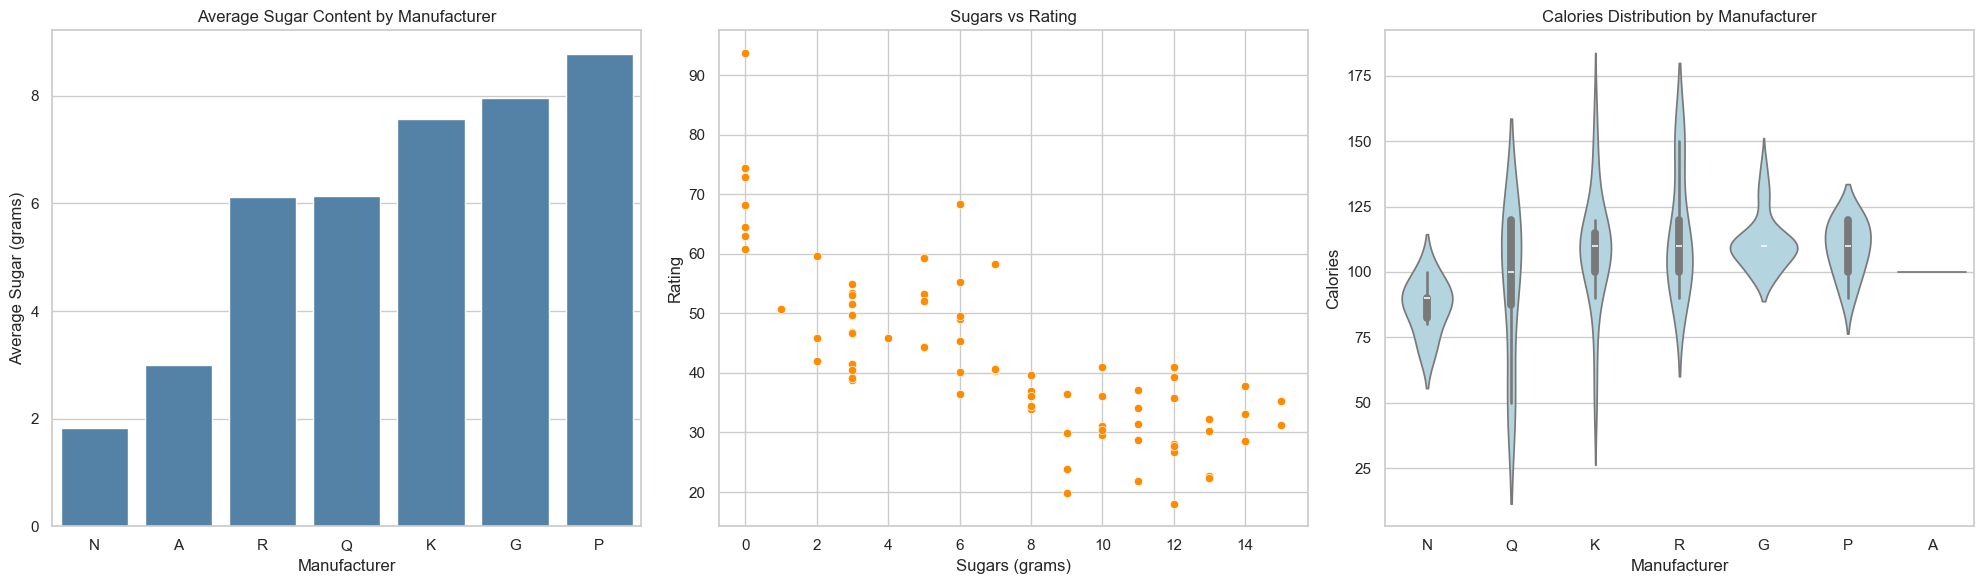

In [43]:
# Step 6: Additional Visualizations
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Bar Plot: Average sugar content by manufacturer
avg_sugar_by_mfr = cereal_data.groupby('mfr')['sugars'].mean().sort_values()
sns.barplot(x=avg_sugar_by_mfr.index, y=avg_sugar_by_mfr.values, ax=axes[0], color="steelblue")
axes[0].set_title("Average Sugar Content by Manufacturer")
axes[0].set_xlabel("Manufacturer")
axes[0].set_ylabel("Average Sugar (grams)")

# 2. Scatter Plot: Sugars vs Rating
sns.scatterplot(x='sugars', y='rating', data=cereal_data, ax=axes[1], color="darkorange")
axes[1].set_title("Sugars vs Rating")
axes[1].set_xlabel("Sugars (grams)")
axes[1].set_ylabel("Rating")

# 3. Violin Plot: Calories distribution by manufacturer
sns.violinplot(x='mfr', y='calories', data=cereal_data, ax=axes[2], color="lightblue")
axes[2].set_title("Calories Distribution by Manufacturer")
axes[2].set_xlabel("Manufacturer")
axes[2].set_ylabel("Calories")

plt.tight_layout()
plt.show()


In [45]:

# Defining healthiness score as an arbitrary function combining calories, sugars, and fiber
# For simplicity, we assume that lower calories and sugar are better, and higher fiber is better.

cereal_data['healthiness_score'] = (cereal_data['fiber'] - cereal_data['sugars']) / cereal_data['calories']

# Rank cereals based on healthiness score
healthiest_cereal = cereal_data.loc[cereal_data['healthiness_score'].idxmax()]
least_healthy_cereal = cereal_data.loc[cereal_data['healthiness_score'].idxmin()]

# Identify cereals with the highest and lowest sugar content
highest_sugar = cereal_data.loc[cereal_data['sugars'].idxmax()]
lowest_sugar = cereal_data.loc[cereal_data['sugars'].idxmin()]

# Find manufacturers that should lower sugar content
avg_sugar_by_mfr = cereal_data.groupby('mfr')['sugars'].mean()
high_sugar_manufacturers = avg_sugar_by_mfr[avg_sugar_by_mfr > avg_sugar_by_mfr.median()]

# Summarize the results
print("Summary of Key Findings and Recommendations:")

# Healthiest and least healthy cereals
print(f"\nHealthiest Cereal: {healthiest_cereal['name']} (Healthiness Score: {healthiest_cereal['healthiness_score']:.2f})")
print(f"Least Healthy Cereal: {least_healthy_cereal['name']} (Healthiness Score: {least_healthy_cereal['healthiness_score']:.2f})")

# Highest and lowest sugar content cereals
print(f"\nCereal with Highest Sugar: {highest_sugar['name']} ({highest_sugar['sugars']} grams of sugar)")
print(f"Cereal with Lowest Sugar: {lowest_sugar['name']} ({lowest_sugar['sugars']} grams of sugar)")

# Manufacturers with higher average sugar content than the median
print("\nManufacturers that should consider lowering sugar content:")
print(high_sugar_manufacturers)

# Additional Recommendation
# Suggest cereals with a low sugar and high fiber ratio
low_sugar_high_fiber_cereals = cereal_data[(cereal_data['sugars'] < cereal_data['sugars'].median()) & (cereal_data['fiber'] > cereal_data['fiber'].median())]

print(f"\nCereals with low sugar and high fiber that are considered healthier options:")
print(low_sugar_high_fiber_cereals[['name', 'sugars', 'fiber', 'calories']])



Summary of Key Findings and Recommendations:

Healthiest Cereal: All-Bran with Extra Fiber (Healthiness Score: 0.28)
Least Healthy Cereal: Golden Crisp (Healthiness Score: -0.15)

Cereal with Highest Sugar: Golden Crisp (15.0 grams of sugar)
Cereal with Lowest Sugar: All-Bran with Extra Fiber (0.0 grams of sugar)

Manufacturers that should consider lowering sugar content:
mfr
G    7.954545
K    7.565217
P    8.777778
Name: sugars, dtype: float64

Cereals with low sugar and high fiber that are considered healthier options:
                         name  sugars  fiber  calories
0                   100% Bran     6.0   10.0        70
2                    All-Bran     5.0    9.0        70
3   All-Bran with Extra Fiber     0.0   14.0        50
8                   Bran Chex     6.0    4.0        90
9                 Bran Flakes     5.0    5.0        90
32          Grape Nuts Flakes     5.0    3.0       100
33                 Grape-Nuts     3.0    3.0       110
34         Great Grains Pecan   